In [19]:
import keras

In [2]:
from keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Process the data as needed for your application
# ...
import gzip


In [3]:
(DATA_URL_TRAIN_DATA, DATA_URL_TRAIN_LABELS), (DATA_URL_TEST_DATA, DATA_URL_TEST_LABELS) = mnist.load_data()

In [4]:

DATA_FILE_TRAIN_DATA   = 'train_data.gz'
DATA_FILE_TRAIN_LABELS = 'train_labels.gz'
DATA_FILE_TEST_DATA    = 'test_data.gz'
DATA_FILE_TEST_LABELS  = 'test_labels.gz'

In [5]:
DATA_FILE_TRAIN_DATA

'train_data.gz'

In [6]:
DATA_URL_TRAIN_DATA

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
# data
DATA_NUM_TRAIN         = 60000
DATA_NUM_TEST          = 10000
DATA_CHANNELS          = 1
DATA_ROWS              = 28
DATA_COLS              = 28
DATA_CLASSES           = 10

In [8]:
# display
DISPLAY_ROWS   = 8
DISPLAY_COLS   = 4
DISPLAY_COL_IN = 10
DISPLAY_ROW_IN = 25
DISPLAY_NUM    = DISPLAY_ROWS*DISPLAY_COLS


In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# training data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_train_data   = gzip.open(DATA_FILE_TRAIN_DATA, 'r')
file_train_data.read(16)
buffer_train_data = file_train_data.read(DATA_NUM_TRAIN*DATA_ROWS*DATA_COLS)
train_data        = np.frombuffer(buffer_train_data, dtype=np.uint8).astype(np.float32)
train_data        = train_data.reshape(DATA_NUM_TRAIN, 1, DATA_ROWS, DATA_COLS)

In [11]:
file_train_data

<gzip _io.BufferedReader name='train_data.gz' 0x159b00fd460>

In [12]:
# training labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_train_labels   = gzip.open(DATA_FILE_TRAIN_LABELS, 'r')
file_train_labels.read(8)
buffer_train_labels = file_train_labels.read(DATA_NUM_TRAIN)
train_labels        = np.frombuffer(buffer_train_labels, dtype=np.uint8).astype(np.int32)

In [13]:
# testing data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_test_data   = gzip.open(DATA_FILE_TEST_DATA, 'r')
file_test_data.read(16)
buffer_test_data = file_test_data.read(DATA_NUM_TEST*DATA_ROWS*DATA_COLS)
test_data        = np.frombuffer(buffer_test_data, dtype=np.uint8).astype(np.float32)
test_data        = test_data.reshape(DATA_NUM_TEST, 1, DATA_ROWS, DATA_COLS)

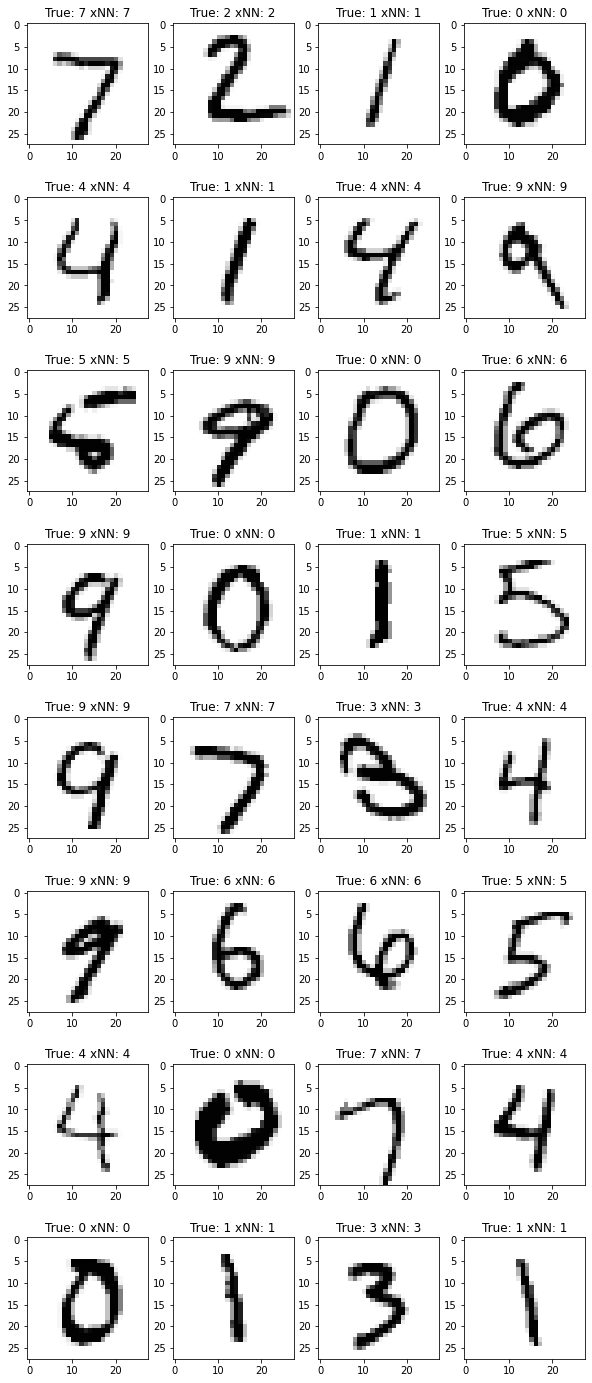

In [14]:
# testing labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_test_labels   = gzip.open(DATA_FILE_TEST_LABELS, 'r')
file_test_labels.read(8)
buffer_test_labels = file_test_labels.read(DATA_NUM_TEST)
test_labels        = np.frombuffer(buffer_test_labels, dtype=np.uint8).astype(np.int32)
fig = plt.figure(figsize=(DISPLAY_COL_IN, DISPLAY_ROW_IN))
ax  = []
for i in range(DISPLAY_NUM):
    img = test_data[i, :, :, :].reshape((DATA_ROWS, DATA_COLS))
    ax.append(fig.add_subplot(DISPLAY_ROWS, DISPLAY_COLS, i + 1))
    ax[-1].set_title('True: ' + str(test_labels[i]) + ' xNN: ' + str(test_labels[i]))
    plt.imshow(img, cmap='Greys')
plt.show()

In [15]:

# Reshaping the training data
train_data=train_data.reshape(60000,784)
print(train_data.shape)
#reshaping the testing data
test_data=test_data.reshape(10000,784)
print(test_data.shape)
#dividing the train and test data by number of pixels
train_data,test_data=train_data/255,test_data/255

X_train,X_test=train_data,test_data
Y_train,Y_test=train_labels,test_labels
print(train_labels.shape,test_labels.shape)

(60000, 784)
(10000, 784)
(60000,) (10000,)


In [16]:
import copy

In [17]:
class CNN:
    kernals = {}
    output_layer = {}
    hyperParameter = {}
#Initialize the parameters
    def __init__(self, num_iterations, l_rate, stride, padding,
                 kernel_dimensions, num_kernals, input_dimensions, len_outputs, incoming_channels, batch_size=1):
        self.hyperParameter = dict(batch_size=batch_size, num_iterations=num_iterations, l_rate=l_rate, stride=stride,
                                   padding=padding, kernel_dimensions=kernel_dimensions, num_kernals=num_kernals,
                                   input_dimensions=input_dimensions, len_outputs=len_outputs, incoming_channels=incoming_channels)
        temp_dim = input_dimensions - kernel_dimensions + 1
        self.output_layer = {
            'para': np.random.randn(len_outputs, num_kernals, temp_dim, temp_dim) / np.sqrt(
                temp_dim ** 2 * num_kernals * len_outputs),
            'bias': np.random.randn(len_outputs, 1) / np.sqrt(len_outputs)
        }
        for i in range(num_kernals):
            self.kernals[i] = np.random.randn(incoming_channels, kernel_dimensions, kernel_dimensions) / np.sqrt(kernel_dimensions ** 2)
# Activation function used in forward_propogation propogation
    def __relu(self, Z, type='ReLU', deri=False):
        # implement the activation function
        if type == 'ReLU':
            if deri == True:
                return 1 * (Z > 0)
            else:
                return Z * (Z > 0)
        elif type == 'Sigmoid':
            if deri == True:
                return 1 / (1 + np.exp(-Z)) * (1 - 1 / (1 + np.exp(-Z)))
            else:
                return 1 / (1 + np.exp(-Z))
        elif type == 'tanh':
            if deri == True:
                return (math.exp(Z) - math.exp(-Z)) / (math.exp(Z) + math.exp(-Z))
            else:
                return 1 - (np.tanh(Z)) ** 2
        else:
            raise TypeError('Invalid type!')

    def Softmax(self, z):
        # Softmax function to calculate the probablity
        return 1 / sum(np.exp(z)) * np.exp(z)

    def cross_entropy(self, p, y):
        # Cross Entropy to find the error loss
        return -np.log(p[y])

    def convolution_network(self, x, kernals):
        #this method implements the convolution operation of a neural network given input data and a set of kernels. 
        #Each kernel is convolved with the input data, producing feature maps for each kernel. 
        #The result is a 3D array representing the output feature maps.
        num_kernals = len(kernals)
        feature_shape = x.shape
        kernel_shape = kernals[0].shape
        t_dim = feature_shape[1] - kernel_shape[1] + 1
        result = np.zeros((num_kernals, t_dim, t_dim))
        for i in range(num_kernals):
            for j in range(t_dim):
                for k in range(t_dim):
                    result[i, j, k] = np.sum(np.multiply(kernals[i], x[:, j:j + kernel_shape[1], k:k + kernel_shape[2]]))
        return result
        
    def forward_propogation(self, x, y):
        #this method performs the forward propagation of the neural network, 
        #including the convolutional layer, activation function, and linear transformation to produce predicted probabilities.
        #It returns a dictionary containing intermediate results for further use in training and evaluation.
        input_dimensions = self.hyperParameter['input_dimensions']
        X = x.reshape(self.hyperParameter['incoming_channels'], input_dimensions, input_dimensions)
        K = self.kernals

        temp_dim = self.hyperParameter['input_dimensions'] - self.hyperParameter['kernel_dimensions'] + 1
        Z = self.convolution_network(X, K)
        H = self.__relu(Z).reshape((temp_dim ** 2 * self.hyperParameter['num_kernals'], 1))
        U = np.matmul(self.output_layer['para'].reshape((10, temp_dim ** 2 * self.hyperParameter['num_kernals'])), H) + \
            self.output_layer['bias']
        predict_list = np.squeeze(self.Softmax(U))
        dic = dict(Z=Z, H=H, U=U, f_X=predict_list.reshape((1, self.hyperParameter['len_outputs'])))
        return dic

    def back_propagation(self, x, y, f_result):
        #this method implements the backpropagation algorithm to compute the gradients of the parameters with respect to the loss in a convolutional neural network.
        E = np.array([0] * self.hyperParameter['len_outputs']).reshape((1, self.hyperParameter['len_outputs']))
        E[0][y] = 1
        dU = (-(E - f_result['f_X'])).reshape((self.hyperParameter['len_outputs'], 1))
        db = copy.copy(dU)
        delta = np.zeros((self.hyperParameter['num_kernals'], 26, 26))
        for i in range(10):
            delta += self.output_layer['para'][i, :] * np.squeeze(dU)[i]

        dW = np.zeros((10, 5, 26, 26))
        for i in range(10):
            dW[i] = np.squeeze(dU)[i] * f_result['H'].reshape((5, 26, 26))
        dK = {}
        for i in range(5):
            tmp_dic = {}
            for j in range(1):
                tmp_dic[j] = np.multiply(f_result['Z'][j], delta[j]).reshape((1, 26, 26))
            dK[i] = self.convolution_network(x.reshape((1, 28, 28)), tmp_dic)

        grad = dict(db=db, dW=dW, dK=dK)
        return grad

    def optimize(self, b_result, learning_rate):
        # update the hyperparameters
        self.output_layer['para'] -= learning_rate * b_result['dW']
        self.output_layer['bias'] -= learning_rate * b_result['db']
        for i in range(5):
            self.kernals[i] -= learning_rate * b_result['dK'][i]

    def loss(self, X_test, Y_test):
        # implement the loss function of the training set
        loss = 0
        for n in range(len(X_test)):
            if n % 1000 == 0:
                print('LOSS: ', n)
            y = Y_test[n]
            x = X_test[n][:]
            loss += self.forward_propogation(x, y)['error']
        return loss

    def train(self, X_train, Y_train):
        learning_rate = self.hyperParameter['l_rate']
        num_iterations = self.hyperParameter['num_iterations']
        rand_indices = np.random.choice(len(X_train), num_iterations, replace=True)

        def l_rate(base_rate, ite, num_iterations, schedule=False):
            if schedule == True:
                return base_rate * 10 ** (-np.floor(ite / num_iterations * 4))
            else:
                return base_rate

        epochs = 1
        loss_values = {}
        test_values = {}

        for i in rand_indices:
            f_result = self.forward_propogation(X_train[i], Y_train[i])
            b_result = self.back_propagation(X_train[i], Y_train[i], f_result)
            self.optimize(b_result, l_rate(learning_rate, i, num_iterations, False))

            if epochs % 100 == 0:
                if epochs % 30000 == 0:
                    loss = 'NA' 
                    test = self.testing(x_test, y_test)
                    print('No of items={}'.format(epochs), 'loss = {}, test = {}'.format(loss, test))
                    test_values[str(epochs)] = test
                else:
                    print('Trained items {}'.format(epochs))
            epochs += 1

        return loss_values, test_values

    def testing(self, X_test, Y_test):
        total_correct = 0
        for n in range(len(X_test)):
            y = Y_test[n]
            x = X_test[n][:]
            prediction = np.argmax(self.forward_propogation(x, y)['f_X'])
            if (prediction == y):
                total_correct += 1
            if n % 1000 == 0:
                print('Testing', n)
        print('Accuarcy Test: ', total_correct / len(X_test))
        return total_correct / np.float64(len(X_test))


In [18]:
model = CNN(batch_size=1, num_iterations=1000, l_rate=0.01, stride=1,
            padding=0, kernel_dimensions=3, num_kernals=5, input_dimensions=28, incoming_channels=1, len_outputs=10)
lossGraph, testGraph = model.train(X_train, Y_train)

Trained items 100
Trained items 200
Trained items 300
Trained items 400
Trained items 500
Trained items 600
Trained items 700
Trained items 800
Trained items 900
Trained items 1000


In [79]:
accuracy = model.testing(X_test, Y_test)

Testing 0
Testing 1000
Testing 2000
Testing 3000
Testing 4000
Testing 5000
Testing 6000
Testing 7000
Testing 8000
Testing 9000
Accuarcy Test:  0.8597
